# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Luke\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)
# bitcoin_headlines

# Show the total number of news
bitcoin_headlines["totalResults"]

7687

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)
# ethereum_headlines

# Show the total number of news
ethereum_headlines["totalResults"]

3797

In [6]:
# # Create the Bitcoin sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [7]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = create_df(bitcoin_headlines["articles"])
bitcoin_df.head()

,title,description,text,date
0,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17
1,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23
2,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12
3,Cryptoverse: Remember when bitcoin was 'anonym...,Bitcoin just isn't anonymous enough for a grow...,March 22 (Reuters) - Bitcoin just isn't anonym...,2022-03-22
4,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = create_df(ethereum_headlines["articles"])
ethereum_df.head()

,title,description,text,date
0,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,"In February, shit hit the fan in the usual way...",2022-03-01
1,Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,Coinbase reported that the share of trading vo...,2022-02-25
2,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,Illustration by James Bareham / The Verge\r\n\...,2022-02-26
3,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22
4,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,"If it sounds too good to be true, youre not wr...",2022-03-13


In [10]:
# Describe the Bitcoin Sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [11]:
# Bitcoin Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df = bitcoin_df.join(title_sentiment_df).join(text_sentiment_df)

bitcoin_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
1,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1
2,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,0.0000,0.000,1.000,0.000,0,-0.7713,0.000,0.831,0.169,-1
3,Cryptoverse: Remember when bitcoin was 'anonym...,Bitcoin just isn't anonymous enough for a grow...,March 22 (Reuters) - Bitcoin just isn't anonym...,2022-03-22,0.0000,0.000,1.000,0.000,0,0.6369,0.171,0.829,0.000,1
4,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,0.0258,0.247,0.515,0.237,0,0.0000,0.000,1.000,0.000,0


<AxesSubplot:title={'center':'BITCOIN News Title and Text Sentiment Comparisson'}>

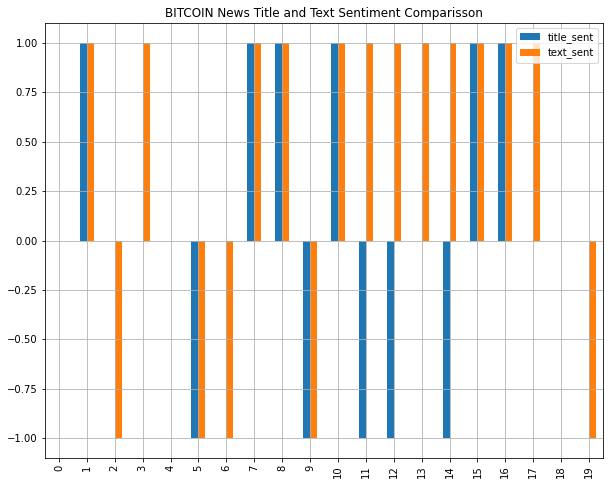

In [12]:
# Plot bar chart
bitcoin_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BITCOIN News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [13]:
bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.027750,0.081450,0.814550,0.103950,0.050000,0.136485,0.071500,0.889750,0.038800,0.350000
std,0.271373,0.105278,0.184348,0.144677,0.759155,0.423909,0.051528,0.070043,0.060936,0.875094
min,-0.599400,0.000000,0.515000,0.000000,-1.000000,-0.771300,0.000000,0.739000,0.000000,-1.000000
25%,-0.019300,0.000000,0.615000,0.000000,-0.250000,-0.032000,0.036000,0.852500,0.000000,-0.250000
50%,0.000000,0.000000,0.823000,0.000000,0.000000,0.318200,0.077500,0.879500,0.000000,1.000000
75%,0.165400,0.213750,1.000000,0.210000,1.000000,0.458800,0.099500,0.937000,0.052000,1.000000
max,0.401900,0.247000,1.000000,0.438000,1.000000,0.636900,0.171000,1.000000,0.187000,1.000000


In [14]:
# Describe the Ethereum Sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [15]:
# Ethereum Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df = ethereum_df.join(title_sentiment_df).join(text_sentiment_df)

ethereum_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,"In February, shit hit the fan in the usual way...",2022-03-01,-0.3818,0.00,0.698,0.302,-1,-0.3182,0.059,0.848,0.093,-1
1,Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,Coinbase reported that the share of trading vo...,2022-02-25,0.0000,0.00,1.000,0.000,0,0.6705,0.188,0.812,0.000,1
2,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,0.0000,0.00,1.000,0.000,0,-0.4588,0.000,0.917,0.083,-1
3,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,-0.1027,0.11,0.762,0.129,-1,0.0000,0.000,1.000,0.000,0
4,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,"If it sounds too good to be true, youre not wr...",2022-03-13,0.0000,0.00,1.000,0.000,0,0.8340,0.236,0.713,0.050,1


<AxesSubplot:title={'center':'ETHEREUM News Title and Text Sentiment Comparisson'}>

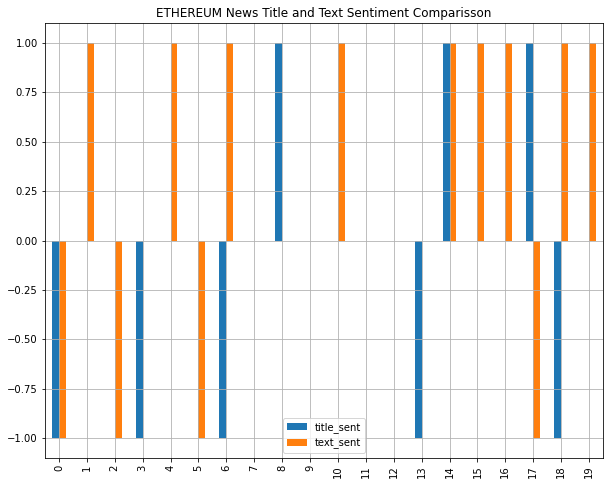

In [16]:
# Plot bar chart
ethereum_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="ETHEREUM News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [17]:
ethereum_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,-0.022455,0.031250,0.925000,0.043800,-0.100000,0.210425,0.080850,0.89450,0.024600,0.250000
std,0.187591,0.070197,0.104953,0.086559,0.640723,0.427857,0.094548,0.10717,0.037614,0.786398
min,-0.381800,0.000000,0.698000,0.000000,-1.000000,-0.526700,0.000000,0.68200,0.000000,-1.000000
25%,-0.025675,0.000000,0.869500,0.000000,-0.250000,0.000000,0.000000,0.84100,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.053000,0.91450,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.028250,0.000000,0.528675,0.141500,1.00000,0.048500,1.000000
max,0.458800,0.250000,1.000000,0.302000,1.000000,0.867600,0.270000,1.00000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest title_pos mean of 0.064.

Q: Which coin had the highest compound score?

A: Ethereum has the highest title_compund score of 0.46.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest title_pos score of 0.30.

Note: I used title for all questions as it has more context to the brief. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Bitcoin Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

article = bitcoin_headlines
print(article)

{'status': 'ok', 'totalResults': 7687, 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Elizabeth Lopatto', 'title': 'If you’re a Russian YouTuber, how do you get paid now?', 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.', 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble', 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg', 'publishedAt': '2022-03-17T13:33:43Z', 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}, {'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': None, 'title': 'El Salvador turns to Binance for help on

In [20]:
# Ethereum Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

article = ethereum_headlines
print(article)

{'status': 'ok', 'totalResults': 3797, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Shanti Escalante-De Mattei', 'title': 'Web3 Threatens to Segregate Our Online Lives', 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.', 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/', 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg', 'publishedAt': '2022-03-01T14:00:00Z', 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}, {'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'prosen@insider.com (Phil Rosen)', 'title': 'Coinbase earnings show tradi

In [21]:
# Create a list of stopwords
sw = set(stopwords.words('english'))

In [22]:
# Expand the default stopwords list if necessary
sw_addons = {"said", "sent", "found", "including", "today", "announced", "week", "basically", "also", "…", "'s", 'u'}

In [23]:
stop = set(list(sw)+list(sw_addons))

In [24]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    ## Define and apply the regex parameters
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]

    
    return tokens

In [25]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[Russia, invaded, Ukraine, Niki, Proshin, alre..."
1,El Salvador turns to Binance for help on bitco...,El Salvador is seeking support from cryptocurr...,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",2022-03-23,0.4019,0.213,0.787,0.000,1,0.4939,0.123,0.877,0.000,1,"[SAN, SALVADOR, March, 23, Reuters, El, Salvad..."
2,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,0.0000,0.000,1.000,0.000,0,-0.7713,0.000,0.831,0.169,-1,"[``, Bitcoin, seen, many, libertarian-leaning,..."
3,Cryptoverse: Remember when bitcoin was 'anonym...,Bitcoin just isn't anonymous enough for a grow...,March 22 (Reuters) - Bitcoin just isn't anonym...,2022-03-22,0.0000,0.000,1.000,0.000,0,0.6369,0.171,0.829,0.000,1,"[March, 22, Reuters, Bitcoin, n't, anonymous, ..."
4,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,0.0258,0.247,0.515,0.237,0,0.0000,0.000,1.000,0.000,0,"[March, 1, Reuters, Bitcoin, leapt, since, Rus..."


In [26]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,"In February, shit hit the fan in the usual way...",2022-03-01,-0.3818,0.00,0.698,0.302,-1,-0.3182,0.059,0.848,0.093,-1,"[February, shit, hit, fan, usual, way, old, tw..."
1,Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,Coinbase reported that the share of trading vo...,2022-02-25,0.0000,0.00,1.000,0.000,0,0.6705,0.188,0.812,0.000,1,"[Coinbase, reported, share, trading, volume, e..."
2,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,0.0000,0.00,1.000,0.000,0,-0.4588,0.000,0.917,0.083,-1,"[Illustration, James, Bareham, Verge, 15, mill..."
3,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,-0.1027,0.11,0.762,0.129,-1,0.0000,0.000,1.000,0.000,0,"[name, Vitalik, Buterin, dedicating, cover, re..."
4,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,"If it sounds too good to be true, youre not wr...",2022-03-13,0.0000,0.00,1.000,0.000,0,0.8340,0.236,0.713,0.050,1,"[sound, good, true, youre, wrong, Yield, farmi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [28]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'SAN'), 4),
 (('SAN', 'SALVADOR'), 4),
 (('SALVADOR', 'March'), 4),
 (('Reuters', 'El'), 4),
 (('El', 'Salvador'), 4),
 (('March', '22'), 4),
 (('22', 'Reuters'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (('char', 'March'), 3),
 (('since', 'Russia'), 3),
 (('bitcoin-backed', 'bond'), 3),
 (('Russia', 'invaded'), 2),
 (('invaded', 'Ukraine'), 2),
 (('Russia', 'invasion'), 2),
 (('invasion', 'Ukraine'), 2),
 (('Getty', 'Welcome'), 2),
 (('Welcome', 'Nonfungible'), 2),
 (('Nonfungible', 'Tidbits'), 2),
 (('char', 'LONDON'), 2),
 (('LONDON', 'March'), 2)]

In [29]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'cryptocurrency'), 4),
 (('cryptocurrency', 'boom'), 4),
 (('boom', 'past'), 4),
 (('past', 'year'), 4),
 (('year', 'helped'), 4),
 (('helped', 'propel'), 4),
 (('propel', 'newer'), 4),
 (('newer', 'market'), 4),
 (('market', 'record'), 4),
 (('record', 'height'), 4),
 (('height', 'digital'), 4),
 (('digital', 'collectible'), 4),
 (('collectible', 'known'), 4),
 (('known', 'NFTs'), 4),
 (('NFTs', 'fact'), 4),
 (('fact', 'total'), 4),
 (('total', 'NFT'), 4),
 (('NFT', 'sale'), 4),
 (('sale', 'volume'), 4),
 (('volume', 'hit'), 4)]

In [30]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(btc_tokens, N = 10)

[('char', 20),
 ('March', 11),
 ('Reuters', 11),
 ('Bitcoin', 8),
 ('Russia', 7),
 ('Ukraine', 6),
 ('crypto', 6),
 ('bitcoin', 5),
 ('SAN', 4),
 ('SALVADOR', 4)]

In [32]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(eth_tokens, N = 10)

[('char', 20),
 ('volume', 6),
 ('year', 6),
 ('past', 6),
 ('hit', 5),
 ('cryptocurrency', 5),
 ('digital', 5),
 ('billion', 5),
 ('Ethereum', 4),
 ('boom', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'BITCOIN WORD CLOUD')

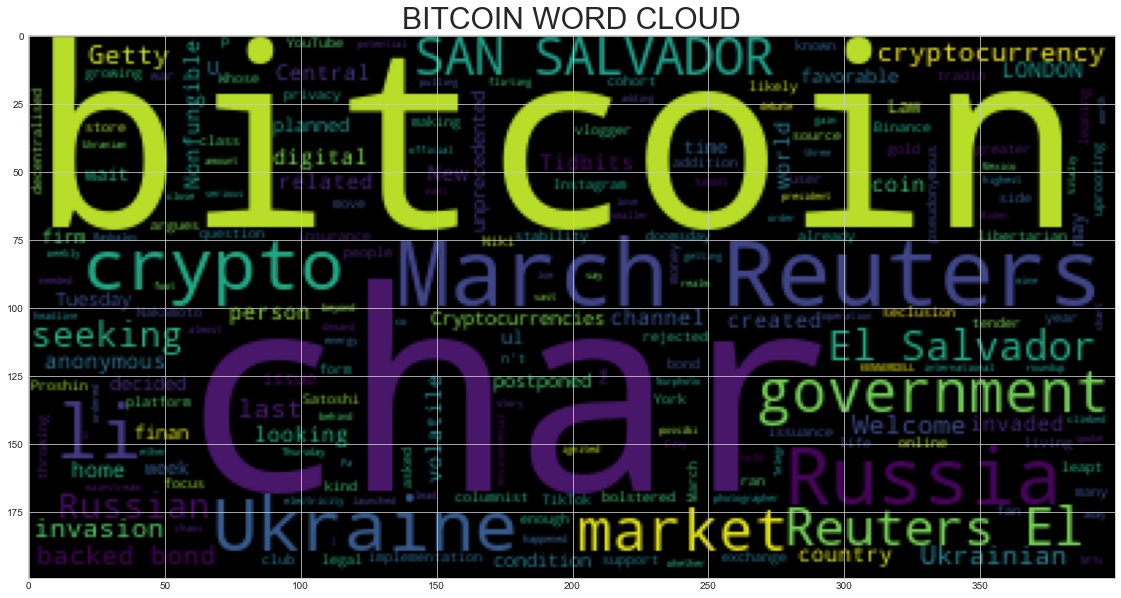

In [34]:
# Generate the Bitcoin word cloud
word_cloud = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(word_cloud)
plt.title("BITCOIN WORD CLOUD", fontdict={'fontsize':30})

Text(0.5, 1.0, 'ETHEREUM WORD CLOUD')

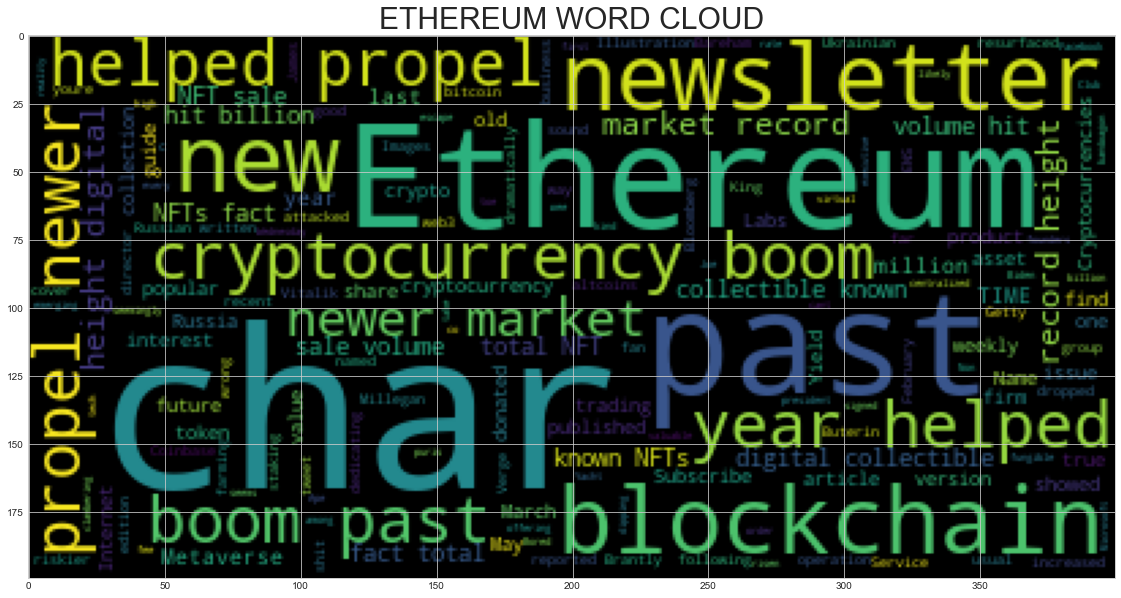

In [35]:
# Generate the Ethereum word cloud
word_cloud = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(word_cloud)
plt.title("ETHEREUM WORD CLOUD", fontdict={'fontsize':30})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [36]:
import spacy
from spacy import displacy

In [37]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [51]:
# Concatenate all of the Bitcoin text together
bitcoin_NER = bitcoin_df["text"].str.cat()

In [52]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_NER)

# Add a title to the document
doc.user_data["title"]="BITCOIN NER"

In [53]:
# Render the visualization
displacy.render(doc, style='ent')

In [55]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
22 CARDINAL
Reuters ORG
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
+3275 ORG
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
Reuters ORG
U.S. GPE
Joe Biden PERSON
chars]KENNERDELL ORG
Pa. GPE
March 21 DATE
Reuters ORG
March 22 DATE
Reuters ORG
Tuesday DATE
almost three weeks DATE
Russia GPE
Ukraine GPE
Reuters ORG
BITCOIN PERSON
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
Summary</li><li> WORK_OF_ART
Law fir

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
ethereum_NER = ethereum_df["text"].str.cat()

In [57]:
# Run the NER processor on all of the text
doc = nlp(ethereum_NER)

# Add a title to the document
doc.user_data["title"]="ETHEREUM NER"

In [59]:
# Render the visualization
displacy.render(doc, style='ent')

In [50]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
last year DATE
Between 2020 and 2021 DATE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
Vitalik Buterin PERSON
TIME ORG
Bloomberg GPE
Getty Images PERSON
28-year-old DATE
Russian NORP
2022 DATE
Facebook ORG
Microsoft ORG
the last year DATE
Bored Ape Yacht Club ORG
one CARDINAL
Ethereum PERSON
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
the past few years DATE
NFT ORG
$24 billion MONEY
Biden PERSON
Wednesday DATE
first ORDINAL
TIME ORG
weekly DATE
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
chars]NEW YORK GPE
March 21 DATE
Reuters ORG
a second straight week DATE
CoinShares ORG
Monday DATE
chars]If PERSON
Ethereum ORG
$450 million MONEY
Series EVENT
US GPE
over $7 billion MONEY
Russia GPE
Ukraine GPE
days DATE
March 11 DATE
Yuga Labs PERSON
Meebits NORP
Larva Labs PERSON
more than a dozen CA

---